# NETFLIX DATA ANALYSIS PROJECT---

In [ ]:
Name - Adarsh Tripathi
Roll No - 1240259002


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# DATA PREPROCESSING--

In [3]:
df = pd.read_csv('netflix.csv',lineterminator = '\n')

In [6]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [14]:
df.duplicated().sum()

0

In [12]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Dropping the columns:

In [16]:
cols = ['cast','date_added','description','listed_in','rating']
df.drop(cols,axis = 1, inplace = True)

In [18]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'release_year',
       'duration'],
      dtype='object')

In [20]:
df.head()

,show_id,type,title,director,country,release_year,duration
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,90 min
1,s2,TV Show,Blood & Water,NaN,South Africa,2021,2 Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,NaN,2021,1 Season
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,2021,1 Season
4,s5,TV Show,Kota Factory,NaN,India,2021,2 Seasons


In [9]:
# Convert 'date_added' column to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


In [11]:
# Extract year from 'date_added'
df['year_added'] = df['date_added'].dt.year


In [13]:
# Drop missing years
df_year_added = df.dropna(subset=['year_added'])

# What is the ratio of Movies vs TV Shows on Netflix?


In [23]:
# Count Movies vs TV Shows
type_count = df['type'].value_counts()


In [25]:
# Calculate ratio
ratio = type_count['Movie'] / type_count['TV Show']
print(f"Ratio of Movies to TV Shows: {ratio:.2f} : 1")

Ratio of Movies to TV Shows: 2.29 : 1


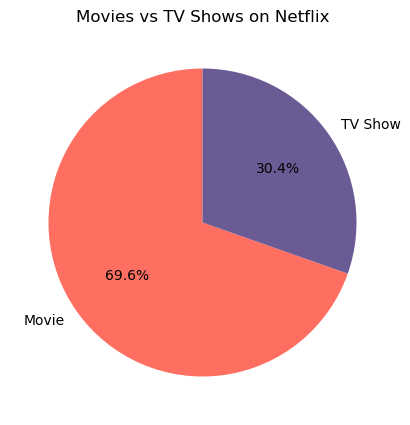

In [27]:
# Plot visualization
plt.figure(figsize=(6,5))
plt.pie(type_count, labels=type_count.index, autopct='%1.1f%%', startangle=90, colors=['#FF6F61', '#6B5B95'])
plt.title('Movies vs TV Shows on Netflix')
plt.show()

# Which genres are most popular on Netflix globally?


In [30]:
# Group by release year and count total titles
content_by_year = df['release_year'].value_counts().sort_index()


In [32]:
# Display the top 10 years with most releases
top_years = content_by_year.sort_values(ascending=False).head(10)
print("Top 10 Years with Highest Netflix Content Releases:")
print(top_years)

Top 10 Years with Highest Netflix Content Releases:
release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
Name: count, dtype: int64


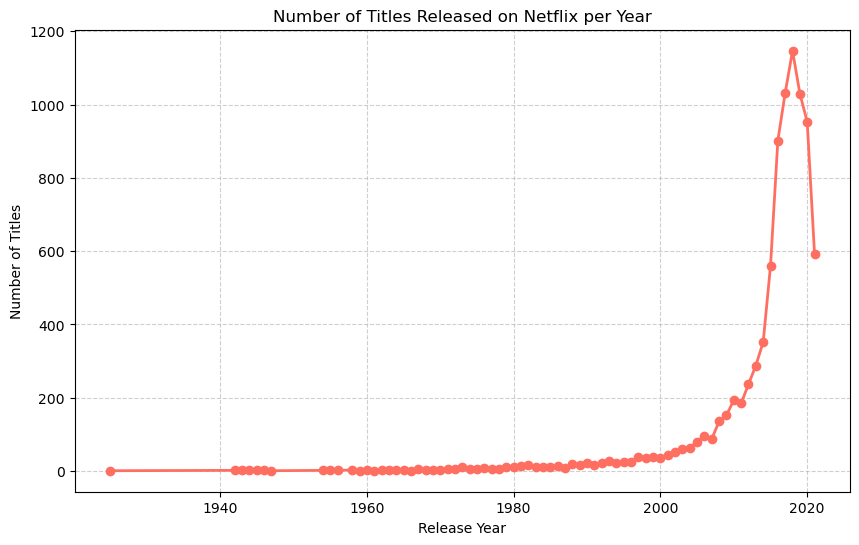

In [34]:
# Plot the trend of releases over time
plt.figure(figsize=(10,6))
plt.plot(content_by_year.index, content_by_year.values, marker='o', linewidth=2, color='#FF6F61')
plt.title('Number of Titles Released on Netflix per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Which countries produce the most Netflix content?


In [39]:
# Drop rows where country information is missing
df_country = df.dropna(subset=['country'])

In [41]:
# Some rows have multiple countries separated by commas
# Split them and count each country individually
country_counts = df_country['country'].str.split(', ').explode().value_counts().head(10)

In [43]:
# Display top 10 countries
print("Top 10 Countries Producing Most Netflix Content:")
print(country_counts)

Top 10 Countries Producing Most Netflix Content:
country
United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: count, dtype: int64


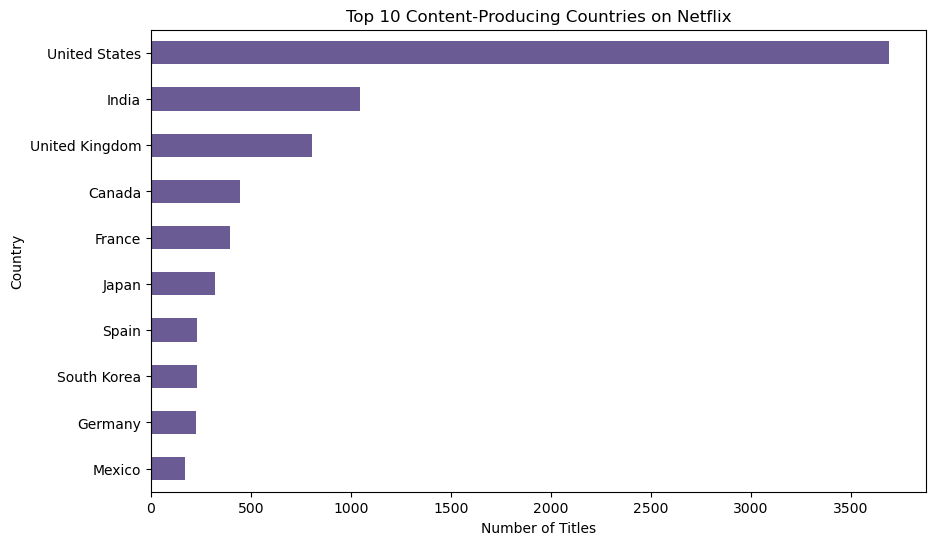

In [49]:
# Plot bar chart
plt.figure(figsize=(10,6))
country_counts.sort_values().plot(kind='barh', color='#6B5B95')
plt.title('Top 10 Content-Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


# How has the trend of adding new content evolved year by year?


In [15]:
# Count number of titles added per year
added_trend = df_year_added['year_added'].value_counts().sort_index()

In [17]:
# Display results
print("Number of Titles Added to Netflix Each Year:")
print(added_trend.tail(10))  # last 10 years

Number of Titles Added to Netflix Each Year:
year_added
2012.0       3
2013.0      10
2014.0      23
2015.0      73
2016.0     418
2017.0    1164
2018.0    1625
2019.0    1999
2020.0    1878
2021.0    1498
Name: count, dtype: int64


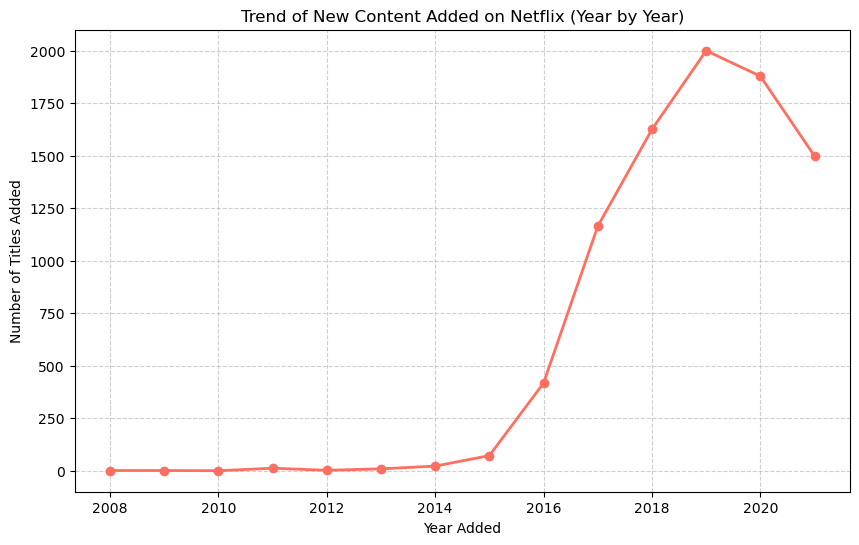

In [19]:
# Plot trend line
plt.figure(figsize=(10,6))
plt.plot(added_trend.index, added_trend.values, marker='o', linewidth=2, color='#FF6F61')
plt.title('Trend of New Content Added on Netflix (Year by Year)')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 2. User Demographics & Targeting


# Which genres are more associated with TV Shows vs Movies?


In [25]:
# Drop rows with missing 'listed_in' or 'type'
df_genre_type = df.dropna(subset=['listed_in', 'type'])

In [27]:
# Split multiple genres and explode
df_genre_type = df_genre_type.assign(listed_in=df_genre_type['listed_in'].str.split(', '))
df_genre_type = df_genre_type.explode('listed_in')

In [29]:
# Count top genres by type (Movie vs TV Show)
genre_by_type = df_genre_type.groupby(['type', 'listed_in']).size().reset_index(name='count')

In [31]:
# Get top 10 genres for each type
top_genres_movie = genre_by_type[genre_by_type['type'] == 'Movie'].nlargest(10, 'count')
top_genres_show  = genre_by_type[genre_by_type['type'] == 'TV Show'].nlargest(10, 'count')


In [33]:
print("Top 10 Genres for Movies:\n", top_genres_movie)
print("\nTop 10 Genres for TV Shows:\n", top_genres_show)

Top 10 Genres for Movies:
      type                 listed_in  count
11  Movie      International Movies   2752
7   Movie                    Dramas   2427
4   Movie                  Comedies   1674
6   Movie             Documentaries    869
0   Movie        Action & Adventure    859
10  Movie        Independent Movies    756
2   Movie  Children & Family Movies    641
15  Movie           Romantic Movies    616
19  Movie                 Thrillers    577
14  Movie          Music & Musicals    375

Top 10 Genres for TV Shows:
        type               listed_in  count
25  TV Show  International TV Shows   1351
35  TV Show               TV Dramas    763
34  TV Show             TV Comedies    581
23  TV Show          Crime TV Shows    470
26  TV Show                Kids' TV    451
24  TV Show              Docuseries    395
29  TV Show       Romantic TV Shows    370
28  TV Show              Reality TV    255
21  TV Show        British TV Shows    253
20  TV Show            Anime Series    1

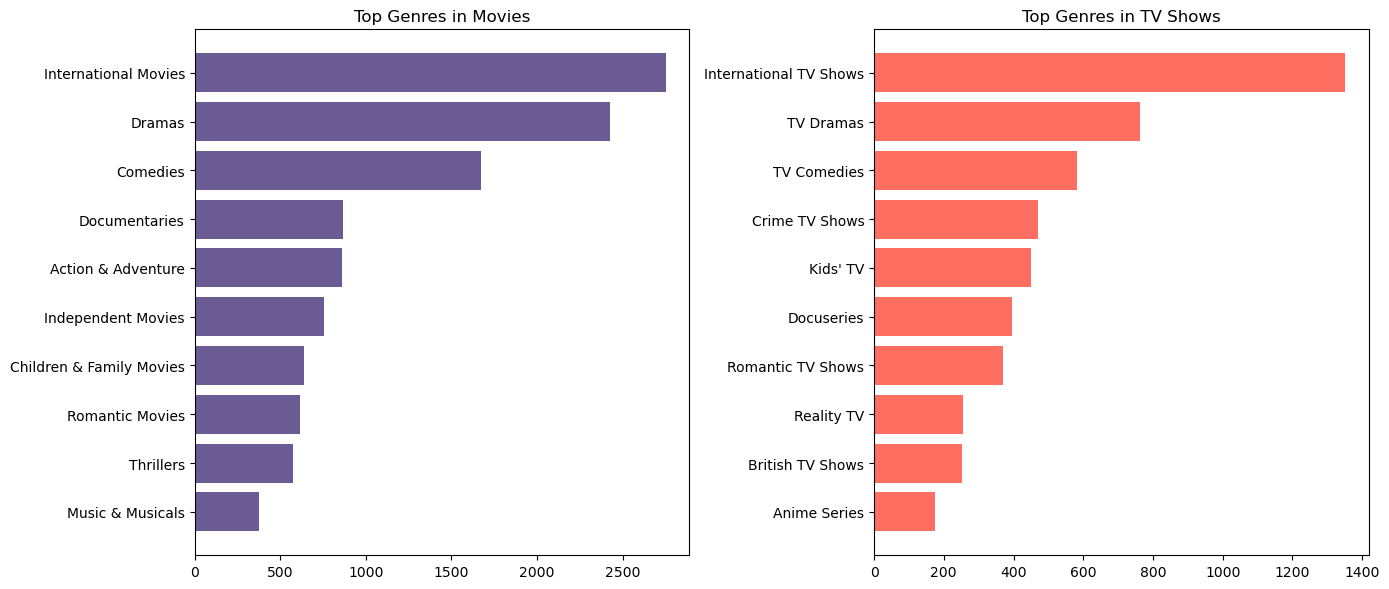

In [35]:
# Visualization (side-by-side)
fig, axes = plt.subplots(1, 2, figsize=(14,6))

axes[0].barh(top_genres_movie['listed_in'], top_genres_movie['count'], color='#6B5B95')
axes[0].set_title('Top Genres in Movies')
axes[0].invert_yaxis()

axes[1].barh(top_genres_show['listed_in'], top_genres_show['count'], color='#FF6F61')
axes[1].set_title('Top Genres in TV Shows')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

# Which genres dominate the U.S. vs other countries?


In [50]:
# Drop rows with missing country or genre
df_country_genre = df.dropna(subset=['country', 'listed_in'])


In [52]:
# Split multiple countries and genres
df_country_genre = df_country_genre.assign(
    country=df_country_genre['country'].str.split(', '),
    listed_in=df_country_genre['listed_in'].str.split(', ')
).explode('country').explode('listed_in')

In [60]:

us_data = df_country_genre[df_country_genre['country'] == 'United States']
non_us_data = df_country_genre[df_country_genre['country'] != 'United States']


In [62]:
# Count most frequent genres
us_genres = us_data['listed_in'].value_counts().head(10)
non_us_genres = non_us_data['listed_in'].value_counts().head(10)

In [64]:
print("Top 10 Genres in United States:\n", us_genres)
print("\nTop 10 Genres in Non-U.S. Countries:\n", non_us_genres)

Top 10 Genres in United States:
 listed_in
Dramas                      835
Comedies                    680
Documentaries               511
Action & Adventure          404
Independent Movies          390
Children & Family Movies    390
Thrillers                   292
TV Comedies                 258
TV Dramas                   232
Romantic Movies             225
Name: count, dtype: int64

Top 10 Genres in Non-U.S. Countries:
 listed_in
International Movies      3134
Dramas                    2254
Comedies                  1207
International TV Shows    1168
Action & Adventure         736
Independent Movies         639
Documentaries              530
TV Dramas                  520
Thrillers                  486
Romantic Movies            469
Name: count, dtype: int64


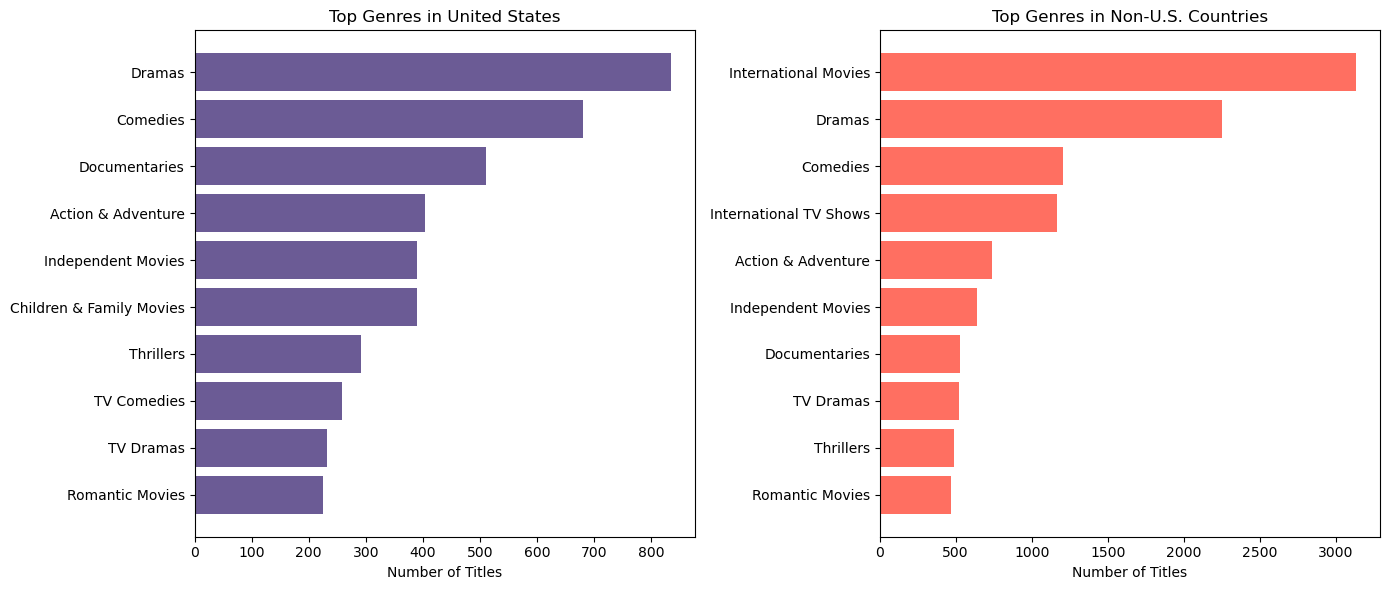

In [66]:
# Visualization (side-by-side)
fig, axes = plt.subplots(1, 2, figsize=(14,6))

axes[0].barh(us_genres.index[::-1], us_genres.values[::-1], color='#6B5B95')
axes[0].set_title('Top Genres in United States')
axes[0].set_xlabel('Number of Titles')

axes[1].barh(non_us_genres.index[::-1], non_us_genres.values[::-1], color='#FF6F61')
axes[1].set_title('Top Genres in Non-U.S. Countries')
axes[1].set_xlabel('Number of Titles')

plt.tight_layout()
plt.show()


# Q10. What genres are most popular in the last 3 years?

Top 10 Most Popular Genres in the Last 3 Years:
listed_in
International Movies        983
Dramas                      947
Comedies                    715
International TV Shows      505
Action & Adventure          366
TV Dramas                   301
Children & Family Movies    292
Romantic Movies             287
Thrillers                   245
TV Comedies                 244
Name: count, dtype: int64


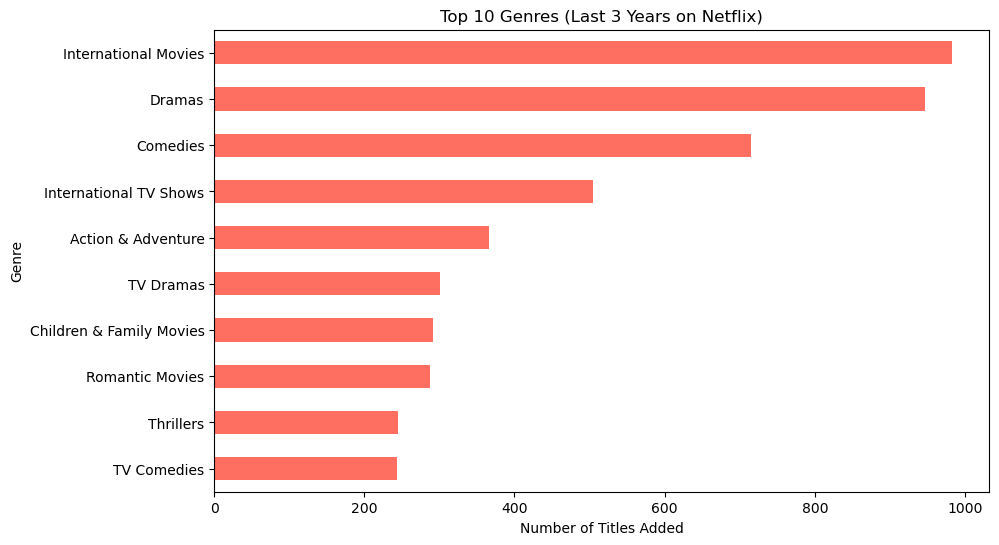

In [69]:
# Convert 'date_added' to datetime  
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract the year Netflix added the title
df['year_added'] = df['date_added'].dt.year

# Filter for the last 3 years (based on dataset range)
recent_years = df[df['year_added'] >= 2020]   # 2020, 2021, 2022

# Drop missing genres
recent_years = recent_years.dropna(subset=['listed_in'])

# Split multiple genres and count occurrences
recent_genres = recent_years['listed_in'].str.split(', ').explode().value_counts().head(10)

print("Top 10 Most Popular Genres in the Last 3 Years:")
print(recent_genres)

# Visualization
plt.figure(figsize=(10,6))
recent_genres.sort_values().plot(kind='barh', color='#FF6F61')
plt.title('Top 10 Genres (Last 3 Years on Netflix)')
plt.xlabel('Number of Titles Added')
plt.ylabel('Genre')
plt.show()

# Talent Acquisition & Partnerships


# Q11. Who are the top 10 directors with the most Netflix content?

In [10]:
# Drop missing directors
df_director = df.dropna(subset=['director'])

In [12]:
# Split cases where multiple directors are listed
df_director = df_director.assign(director=df_director['director'].str.split(', '))
df_director = df_director.explode('director')

In [14]:
# Count top 10 directors by number of titles
top_directors = df_director['director'].value_counts().head(10)


In [16]:
print("Top 10 Directors with the Most Netflix Titles:")
print(top_directors)


Top 10 Directors with the Most Netflix Titles:
director
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Jay Chapman            12
Youssef Chahine        12
Martin Scorsese        12
Name: count, dtype: int64


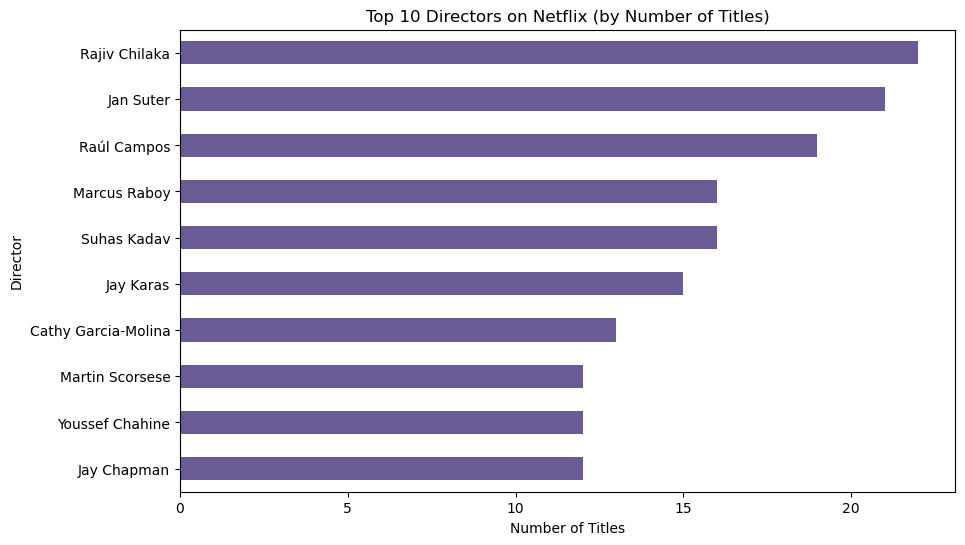

In [18]:
# Visualization
plt.figure(figsize=(10,6))
top_directors.sort_values().plot(kind='barh', color='#6B5B95')
plt.title('Top 10 Directors on Netflix (by Number of Titles)')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

# Q12. Which actors appear most frequently in Netflix shows?

In [21]:
# Drop missing cast entries
df_cast = df.dropna(subset=['cast'])

In [23]:
# Drop missing cast entries
df_cast = df.dropna(subset=['cast'])

In [25]:
# Count top 10 most frequent actors
top_actors = df_cast['cast'].value_counts().head(10)


In [27]:
print("Top 10 Actors Appearing Most Frequently on Netflix:")
print(top_actors)


Top 10 Actors Appearing Most Frequently on Netflix:
cast
David Attenborough                                                                                                        19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                   14
Samuel West                                                                                                               10
Jeff Dunham                                                                                                                7
David Spade, London Hughes, Fortune Feimster                                                                               6
Kevin Hart                                                                                                                 6
Craig Sechler                                                                                                              6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nico

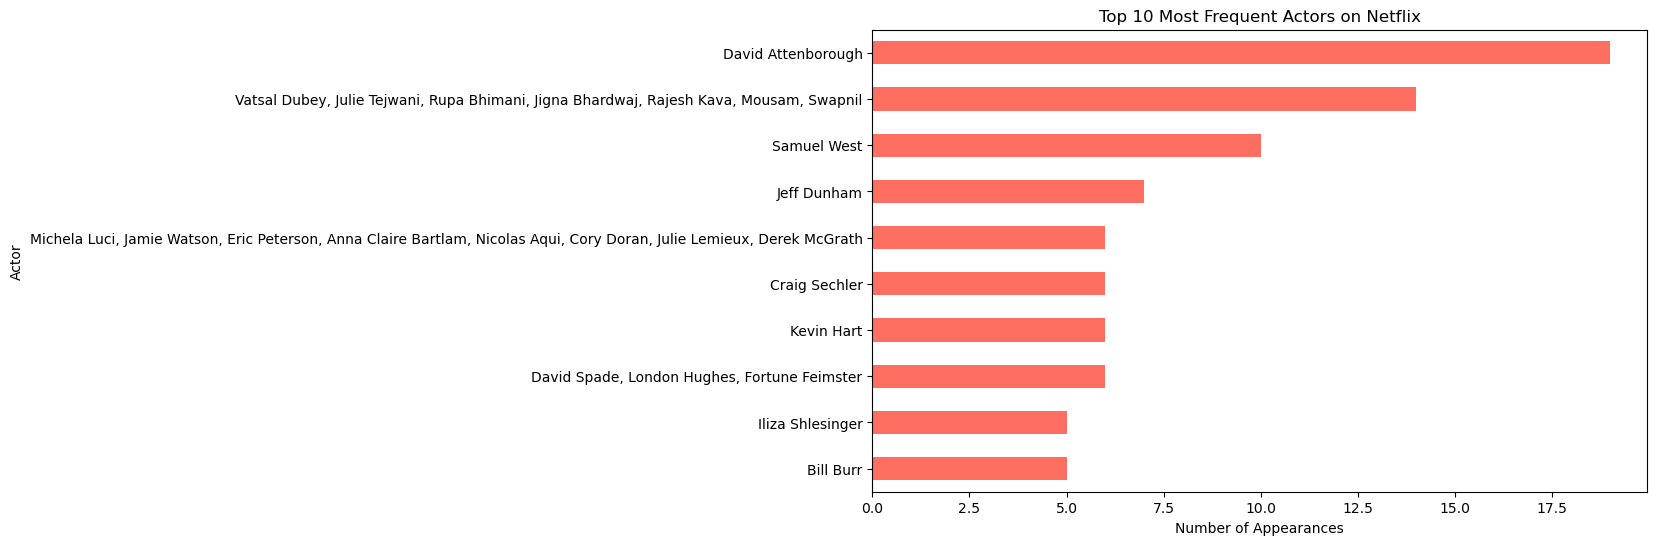

In [29]:
# Visualization
plt.figure(figsize=(10,6))
top_actors.sort_values().plot(kind='barh', color='#FF6F61')
plt.title('Top 10 Most Frequent Actors on Netflix')
plt.xlabel('Number of Appearances')
plt.ylabel('Actor')
plt.show()

# Q13. Which director–genre pairs are most frequent?

In [32]:
# Drop missing directors or genres
df_pair = df.dropna(subset=['director', 'listed_in'])

In [34]:
# Split multiple directors and genres
df_pair = df_pair.assign(
    director=df_pair['director'].str.split(', '),
    listed_in=df_pair['listed_in'].str.split(', ')
).explode('director').explode('listed_in')

In [36]:
# Count director–genre pairs
director_genre = df_pair.groupby(['director', 'listed_in']).size().reset_index(name='count')


In [38]:
# Get top 10 most frequent director–genre combinations
top_pairs = director_genre.sort_values(by='count', ascending=False).head(10)

In [40]:
print("Top 10 Most Frequent Director–Genre Pairs:")
print(top_pairs)


Top 10 Most Frequent Director–Genre Pairs:
                  director                 listed_in  count
8969         Rajiv Chilaka  Children & Family Movies     22
4553             Jan Suter           Stand-Up Comedy     21
9107           Raúl Campos           Stand-Up Comedy     19
10736          Suhas Kadav  Children & Family Movies     16
6817          Marcus Raboy           Stand-Up Comedy     15
4675             Jay Karas           Stand-Up Comedy     14
1839   Cathy Garcia-Molina      International Movies     13
4666           Jay Chapman           Stand-Up Comedy     12
11949      Youssef Chahine                    Dramas     12
11951      Youssef Chahine      International Movies     10


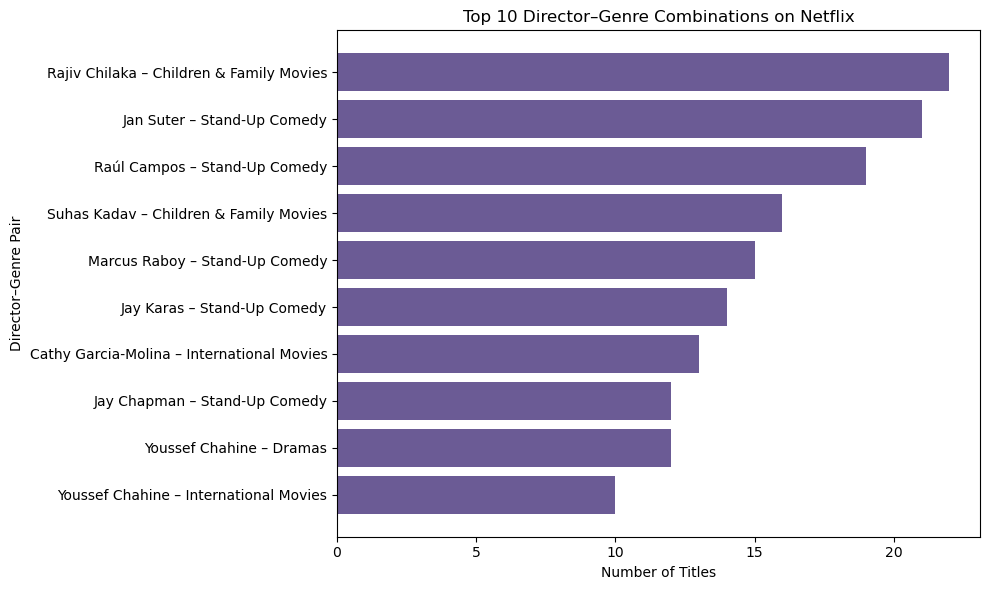

In [42]:
# Visualization
plt.figure(figsize=(10,6))
plt.barh(top_pairs['director'] + ' – ' + top_pairs['listed_in'], top_pairs['count'], color='#6B5B95')
plt.title('Top 10 Director–Genre Combinations on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director–Genre Pair')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# Q14. How many titles have unknown directors or cast members?

In [45]:
# Count missing values for director and cast
unknown_director = df['director'].isna().sum()
unknown_cast = df['cast'].isna().sum()

In [47]:
# Total records
total_titles = len(df)


In [49]:
# Calculate percentages
perc_director = (unknown_director / total_titles) * 100
perc_cast = (unknown_cast / total_titles) * 100


In [51]:
# Display result
print(f"Total Titles: {total_titles}")
print(f"Titles with Unknown Director: {unknown_director} ({perc_director:.2f}%)")
print(f"Titles with Unknown Cast: {unknown_cast} ({perc_cast:.2f}%)")

Total Titles: 8807
Titles with Unknown Director: 2634 (29.91%)
Titles with Unknown Cast: 825 (9.37%)


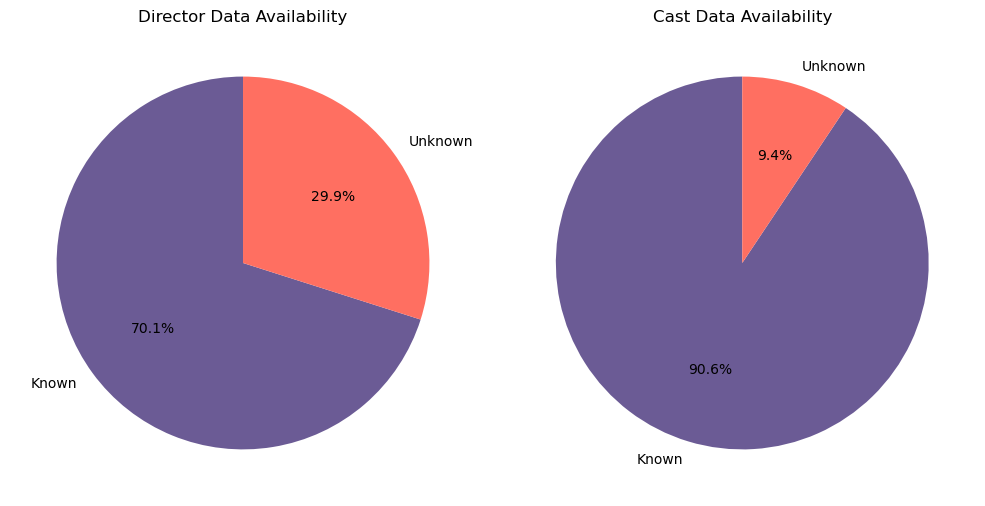

In [53]:
# Visualization
labels = ['Known', 'Unknown']
sizes_director = [total_titles - unknown_director, unknown_director]
sizes_cast = [total_titles - unknown_cast, unknown_cast]

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].pie(sizes_director, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#6B5B95','#FF6F61'])
axes[0].set_title('Director Data Availability')

axes[1].pie(sizes_cast, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#6B5B95','#FF6F61'])
axes[1].set_title('Cast Data Availability')

plt.tight_layout()
plt.show()

# Q15. What is the average duration of Movies on Netflix?

In [56]:
# Filter only Movies
movies_df = df[df['type'] == 'Movie'].copy()

In [58]:
# Extract numeric part of duration (e.g., "90 min" → 90)
movies_df['duration_min'] = movies_df['duration'].str.replace(' min', '', regex=False)
movies_df['duration_min'] = pd.to_numeric(movies_df['duration_min'], errors='coerce')


In [60]:
# Calculate average duration
average_duration = movies_df['duration_min'].mean()

In [62]:
# Display result
print(f"Average Duration of Movies on Netflix: {average_duration:.2f} minutes")


Average Duration of Movies on Netflix: 99.58 minutes


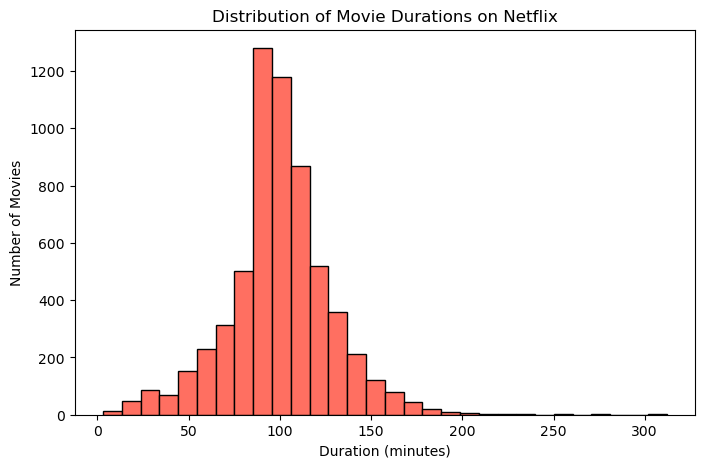

In [64]:
# Plot distribution
plt.figure(figsize=(8,5))
plt.hist(movies_df['duration_min'].dropna(), bins=30, color='#FF6F61', edgecolor='black')
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()


# Q16. What’s the most common number of seasons for TV shows?

In [67]:
# Filter only TV Shows
tv_df = df[df['type'] == 'TV Show'].copy()

In [69]:
# Extract number of seasons from duration column (e.g., "2 Seasons" → 2)
tv_df['seasons'] = tv_df['duration'].str.replace(' Season', '', regex=False).str.replace('s', '', regex=False)
tv_df['seasons'] = pd.to_numeric(tv_df['seasons'], errors='coerce')

In [71]:
# Count frequency of seasons
season_counts = tv_df['seasons'].value_counts().sort_index()

In [73]:
# Most common number of seasons
most_common = season_counts.idxmax()
count_common = season_counts.max()

In [75]:
print(f"Most Common Number of Seasons: {int(most_common)} Season(s)")
print(f"Number of Shows with {int(most_common)} Season(s): {int(count_common)}")

Most Common Number of Seasons: 1 Season(s)
Number of Shows with 1 Season(s): 1793


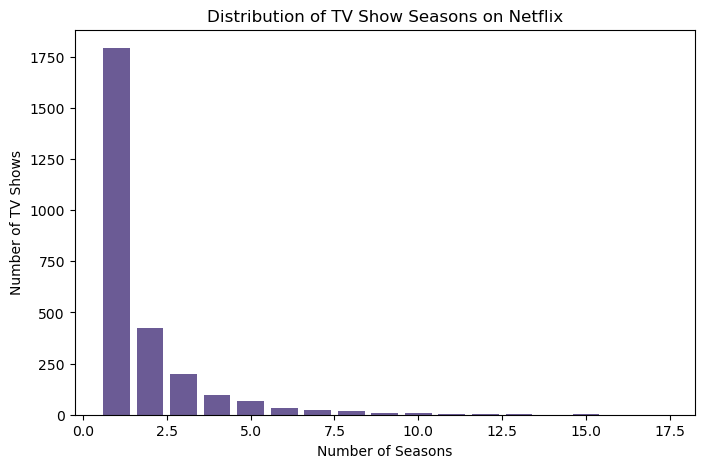

In [77]:
# Plot distribution
plt.figure(figsize=(8,5))
plt.bar(season_counts.index.astype(int), season_counts.values, color='#6B5B95')
plt.title('Distribution of TV Show Seasons on Netflix')
plt.xlabel('Number of Seasons')
plt.ylabel('Number of TV Shows')
plt.show()

# Q17. Is there a trend in movie durations over the years?

In [80]:
# Filter for Movies only
movies_df = df[df['type'] == 'Movie'].copy()

In [82]:
# Extract numeric duration (e.g., "90 min" → 90)
movies_df['duration_min'] = movies_df['duration'].str.replace(' min', '', regex=False)
movies_df['duration_min'] = pd.to_numeric(movies_df['duration_min'], errors='coerce')

In [84]:
# Drop missing durations or release years
movies_df = movies_df.dropna(subset=['duration_min', 'release_year'])

In [86]:
# Calculate average duration per release year
avg_duration_by_year = movies_df.groupby('release_year')['duration_min'].mean()

In [88]:
# Display recent trend
print("Average Movie Duration by Year (last 10 years):")
print(avg_duration_by_year.tail(10))

Average Movie Duration by Year (last 10 years):
release_year
2012    100.757225
2013     98.048889
2014    100.261364
2015     99.513854
2016     95.360182
2017     95.535248
2018     96.185137
2019     93.466035
2020     92.141199
2021     96.444043
Name: duration_min, dtype: float64


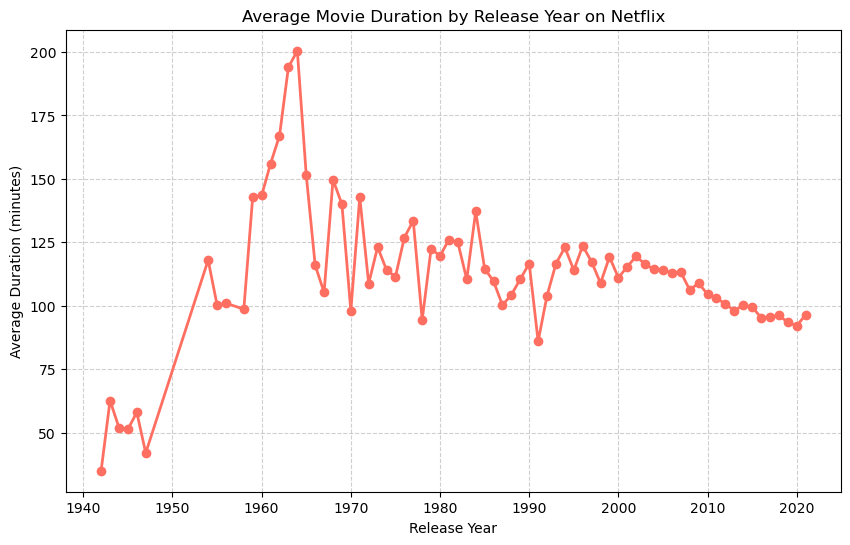

In [90]:
# Plot trend line
plt.figure(figsize=(10,6))
plt.plot(avg_duration_by_year.index, avg_duration_by_year.values, marker='o', color='#FF6F61', linewidth=2)
plt.title('Average Movie Duration by Release Year on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Average Duration (minutes)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Q18. In which months does Netflix add the most content?

In [93]:
# Convert 'date_added' to datetime if not already
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


In [95]:
# Extract month name
df['month_added'] = df['date_added'].dt.month_name()


In [97]:
# Drop rows with missing month
df_month = df.dropna(subset=['month_added'])

In [99]:
# Count number of titles added per month
month_counts = df_month['month_added'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

In [101]:
print("Number of Titles Added by Month:")
print(month_counts)


Number of Titles Added by Month:
month_added
January      727
February     557
March        734
April        759
May          626
June         724
July         819
August       749
September    765
October      755
November     697
December     797
Name: count, dtype: int64


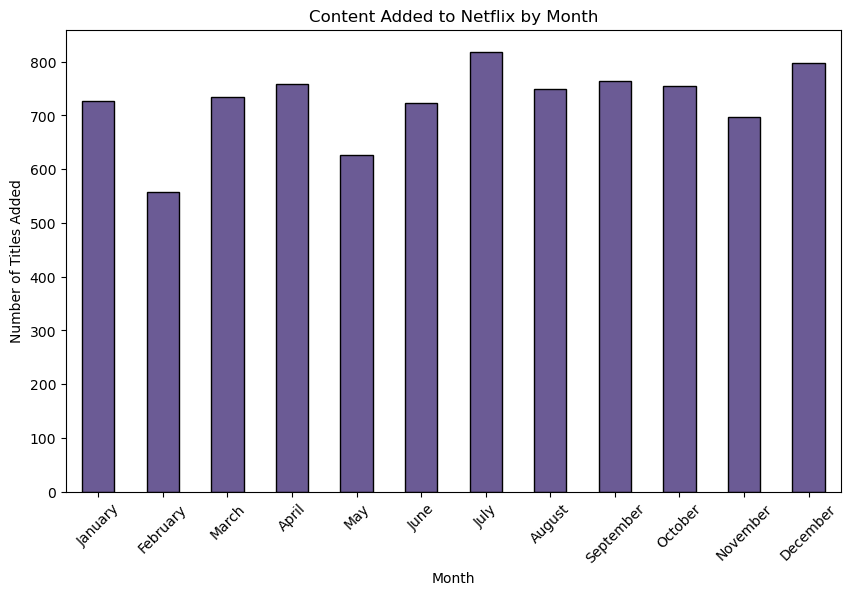

In [103]:
# Plot bar chart
plt.figure(figsize=(10,6))
month_counts.plot(kind='bar', color='#6B5B95', edgecolor='black')
plt.title('Content Added to Netflix by Month')
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45)
plt.show()

# Q19. How does the genre distribution vary across different years?

In [106]:
# Drop missing values
df_genre_year = df.dropna(subset=['listed_in', 'release_year'])

In [108]:
# Split multiple genres
df_genre_year = df_genre_year.assign(listed_in=df_genre_year['listed_in'].str.split(', '))
df_genre_year = df_genre_year.explode('listed_in')


In [110]:
# Group by release year and genre
genre_year_count = df_genre_year.groupby(['release_year', 'listed_in']).size().reset_index(name='count')

In [112]:
# Get top 5 genres overall
top_genres = df_genre_year['listed_in'].value_counts().head(5).index


In [114]:
# Filter for top 5 genres only
genre_year_top = genre_year_count[genre_year_count['listed_in'].isin(top_genres)]


In [116]:
# Pivot for visualization
pivot_df = genre_year_top.pivot(index='release_year', columns='listed_in', values='count').fillna(0)


In [118]:
# Display data
print("Genre Distribution by Year (Top 5 Genres):")
print(pivot_df.tail(10))


Genre Distribution by Year (Top 5 Genres):
listed_in     Comedies  Documentaries  Dramas  International Movies  \
release_year                                                          
2012              61.0           11.0    66.0                  80.0   
2013              65.0           30.0    83.0                 121.0   
2014              79.0           31.0   104.0                 127.0   
2015              94.0           67.0   180.0                 210.0   
2016             150.0          137.0   265.0                 305.0   
2017             164.0          172.0   285.0                 328.0   
2018             178.0          120.0   304.0                 340.0   
2019             159.0          104.0   243.0                 282.0   
2020             133.0           77.0   195.0                 239.0   
2021              70.0           53.0    92.0                 141.0   

listed_in     International TV Shows  
release_year                          
2012                      

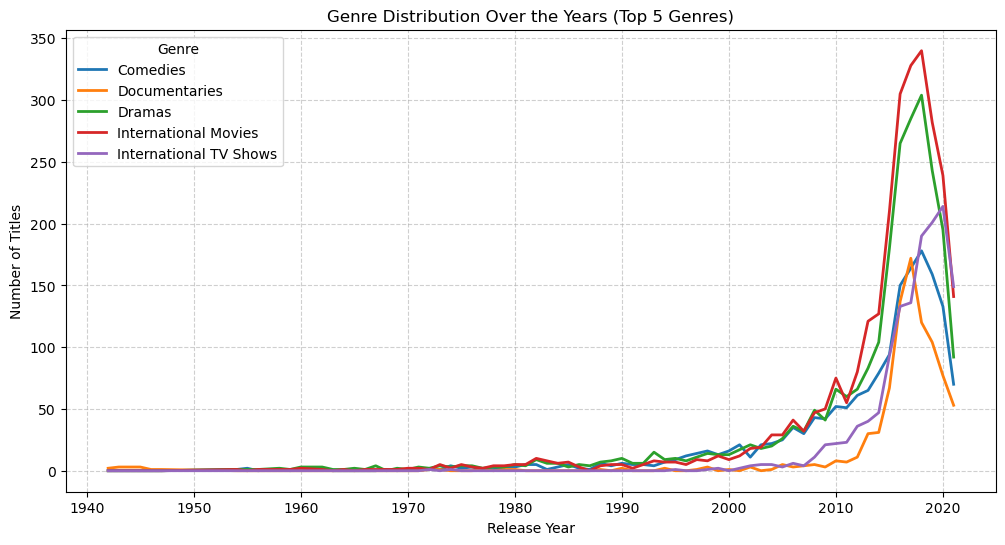

In [120]:
# Plot
pivot_df.plot(kind='line', figsize=(12,6), linewidth=2)
plt.title('Genre Distribution Over the Years (Top 5 Genres)')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Genre')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Q20. Which countries produce the most content in each genre?

In [123]:
# Drop missing values for country and genre
df_country_genre = df.dropna(subset=['country', 'listed_in'])


In [125]:
# Split multiple entries (some titles have multiple countries or genres)
df_country_genre = df_country_genre.assign(
    country=df_country_genre['country'].str.split(', '),
    listed_in=df_country_genre['listed_in'].str.split(', ')
).explode('country').explode('listed_in')


In [127]:
# Group and count titles by country and genre
country_genre_count = df_country_genre.groupby(['country', 'listed_in']).size().reset_index(name='count')

In [129]:
# Get top 10 country-genre pairs
top_country_genres = country_genre_count.sort_values(by='count', ascending=False).head(10)


In [131]:
print("Top 10 Country–Genre Combinations:")
print(top_country_genres)

Top 10 Country–Genre Combinations:
            country                 listed_in  count
526           India      International Movies    864
1351  United States                    Dramas    835
1346  United States                  Comedies    680
522           India                    Dramas    662
1349  United States             Documentaries    511
1339  United States        Action & Adventure    404
1354  United States        Independent Movies    390
1343  United States  Children & Family Movies    390
517           India                  Comedies    323
1380  United States                 Thrillers    292


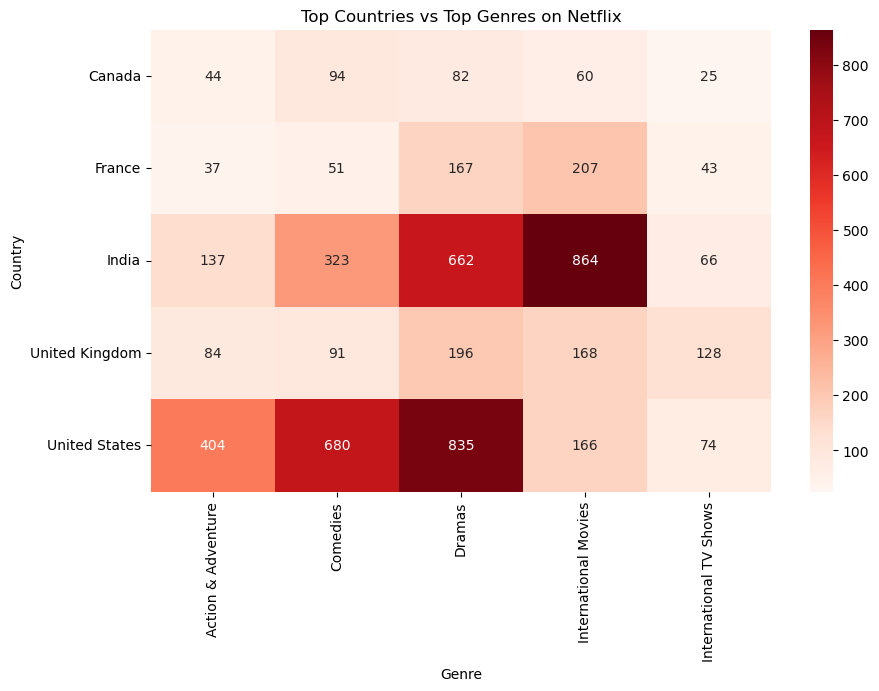

In [133]:
# Visualization — heatmap of top content-producing countries vs genres
top_countries = df_country_genre['country'].value_counts().head(5).index
top_genres = df_country_genre['listed_in'].value_counts().head(5).index
heatmap_data = country_genre_count[
    country_genre_count['country'].isin(top_countries) & country_genre_count['listed_in'].isin(top_genres)
].pivot(index='country', columns='listed_in', values='count').fillna(0)

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, cmap='Reds', fmt='.0f')
plt.title('Top Countries vs Top Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Country')
plt.show()